# Лабораторная работа

# Спектральный анализ электрических сигналов

In [2]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error
from IPython.display import Image 
from scipy.interpolate import interp1d
#%matplotlib inline
def mnkGP(x,y):
    d = 1 # степень полинома
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, d, full=True) # Модель
    f = sp.poly1d(fp) # аппроксимирующая функция
    y1=[fp[0]*x[i]+fp[1] for i in range(0,len(x))] # значения функции a*x+b
    so=round(sum([abs(y[i]-y1[i]) for i in range(0,len(x))])/(len(x)*sum(y))*100,4) # средняя ошибка
    fx = sp.linspace(x[0], x[-1] + 1, len(x)) # можно установить вместо len(x) большее число для интерполяции
    #plt.plot(x, y, 'o', label='Original data', markersize=10)
    #plt.plot(fx, f(fx))
    #plt.grid(True)
    #plt.ylabel('I')
    #plt.xlabel('U')
    #plt.title(f'$I_p$ = {round(fp[1],3)} mA')
    #plt.show()
    return fp[0], fp[1], so



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


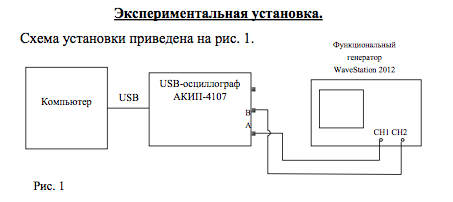

In [3]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/lab4.png')

## Исследование спектра периодической последовательности прямоугольных импульсов.

### Изменение спектра при увеличении $\tau$ вдвое

### $\tau=100 мкс$

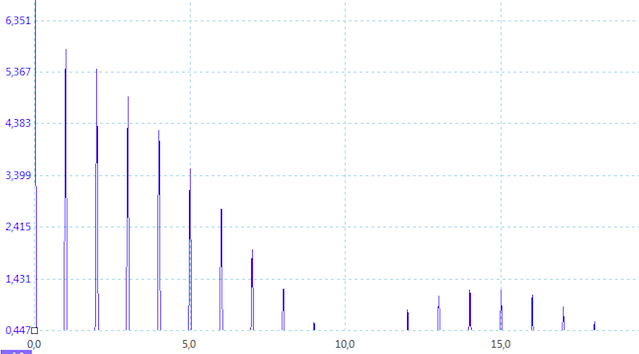

In [4]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/1/7-a-100.png')

### $\tau=200мкс$

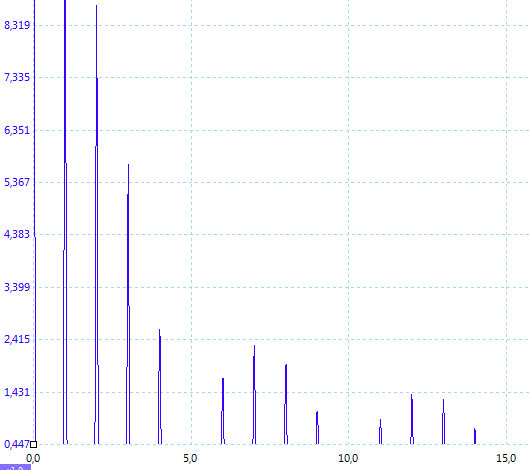

In [5]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/1/7-a-200.png')

### Видим, что $\Delta \nu$ уменьшилась в два раза, а $\delta \nu$ осталась неизменной

### При увеличении $f_{repeat}$ вдвое

### $f_{repeat}=1$кГц

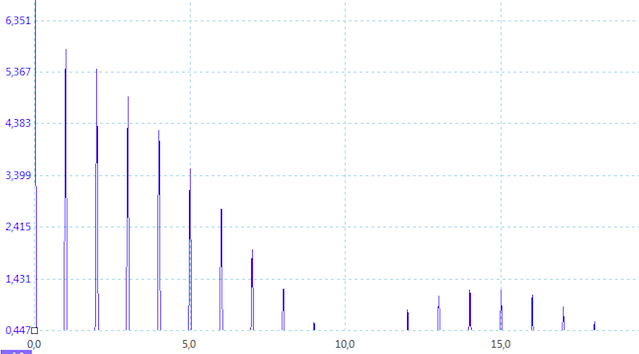

In [6]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/1/7-a-100.png')

### $f_{repeat}=2$кГц

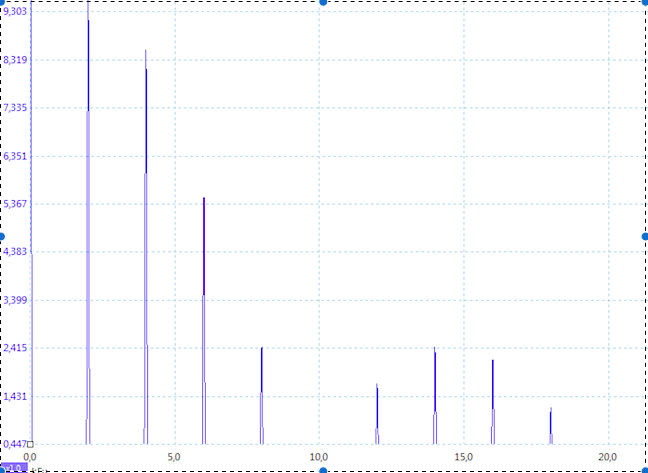

In [7]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/1/7-b-100.png')

### Видим, что $\Delta \nu$ осталась неизменной, а $\delta \nu$ уменьшилась в два раза

## Измерение зависимости ширины спектра $\Delta \nu$ от длительности импульса $\tau$

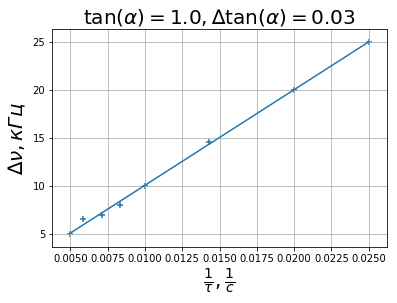

In [8]:
nu_1 = np.array([25, 20, 14.6, 10, 8, 7, 6.5, 5])
tau_1 = np.array([40,50,70,100,120, 140,170,200])
k_1, b_1, loss_1 = mnkGP(1/tau_1, nu_1)
x_tan_1 = np.linspace(1/200,1/40,10)
y_tan_1 = k_1*x_tan_1 + b_1
plt.plot(x_tan_1, y_tan_1)
plt.scatter(1/tau_1, nu_1, marker='+')
plt.ylabel(r'$∆\nu, кГц$', fontsize=20)
plt.xlabel(r"$\frac{1}{\tau}, \frac{1}{c}$", fontsize=20)
plt.title(r"$\tan(\alpha) = {} ,∆\tan(\alpha) = 0.03$".format(round(k_1/10**3, 2)), fontsize=20)
plt.grid(True)

### Полученный результат подтверждает наши предположения о справедливости соотношения неопределенности.

# Исследование спектра периодической последовательности цугов гармонических колебаний.

### Изменение спектра при увеличении $\tau$ вдвое

### $\tau=100мкс$

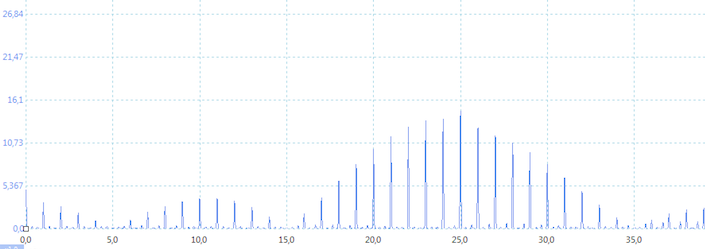

In [9]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/1/16_100.png')

### $\tau=200мкс$

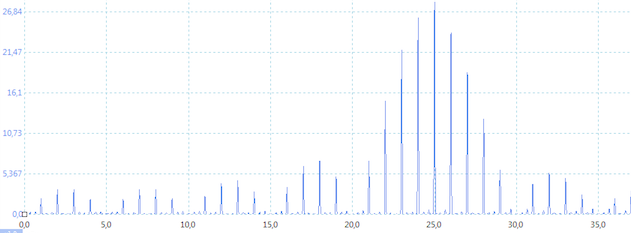

In [10]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/1/16_200.png')

### Видим, что $\Delta \nu$ уменьшилась в два раза, а $\delta \nu$ осталась неизменной. Полученные результаты аналогичны 1 пункту.

## Изменение картины спектра при изменении несущей частоты

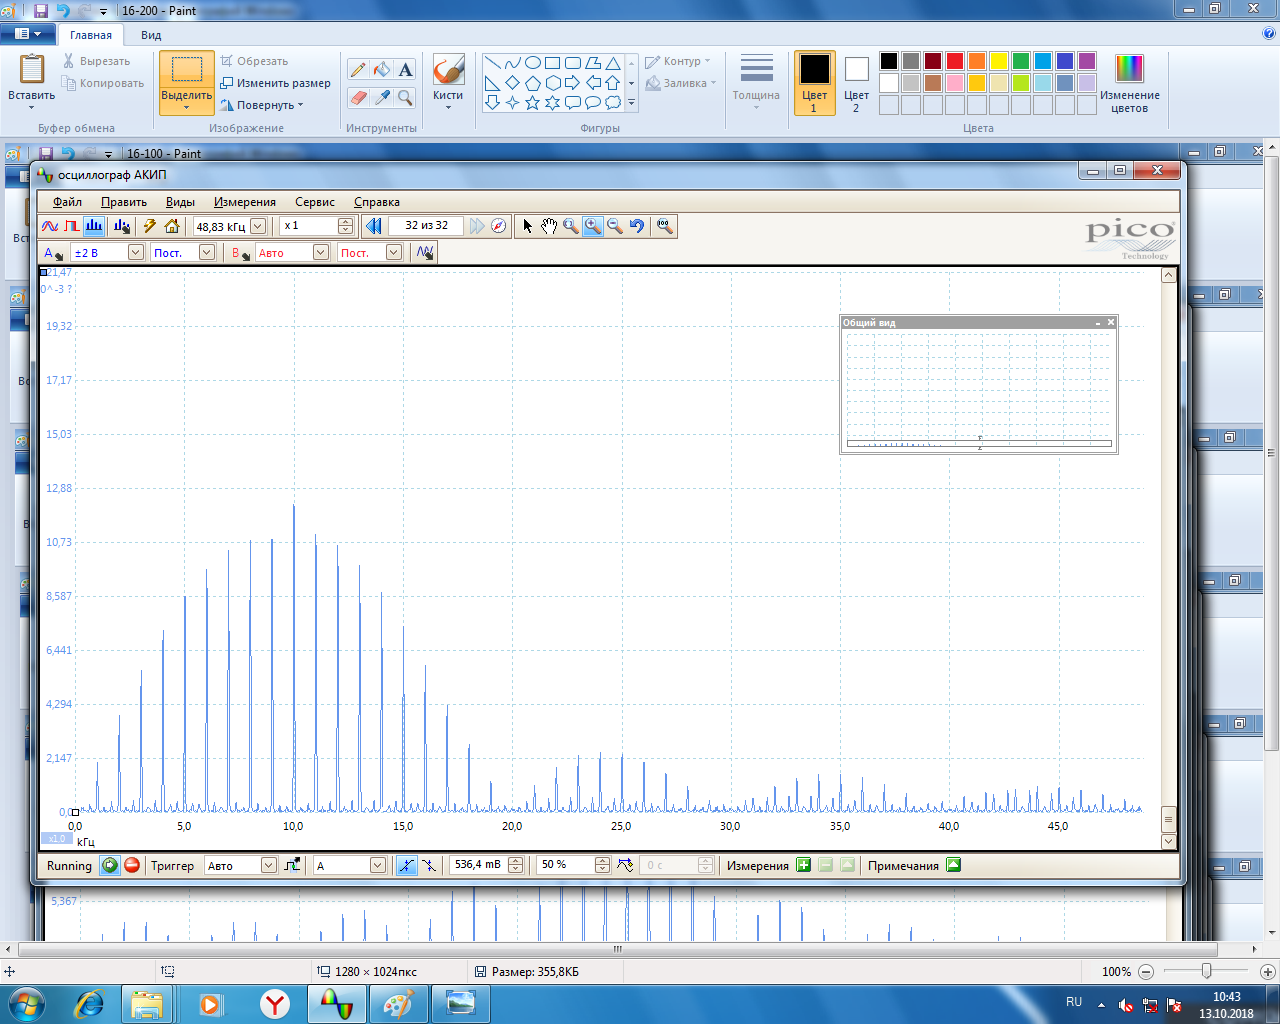

In [11]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/1/17-10.png')

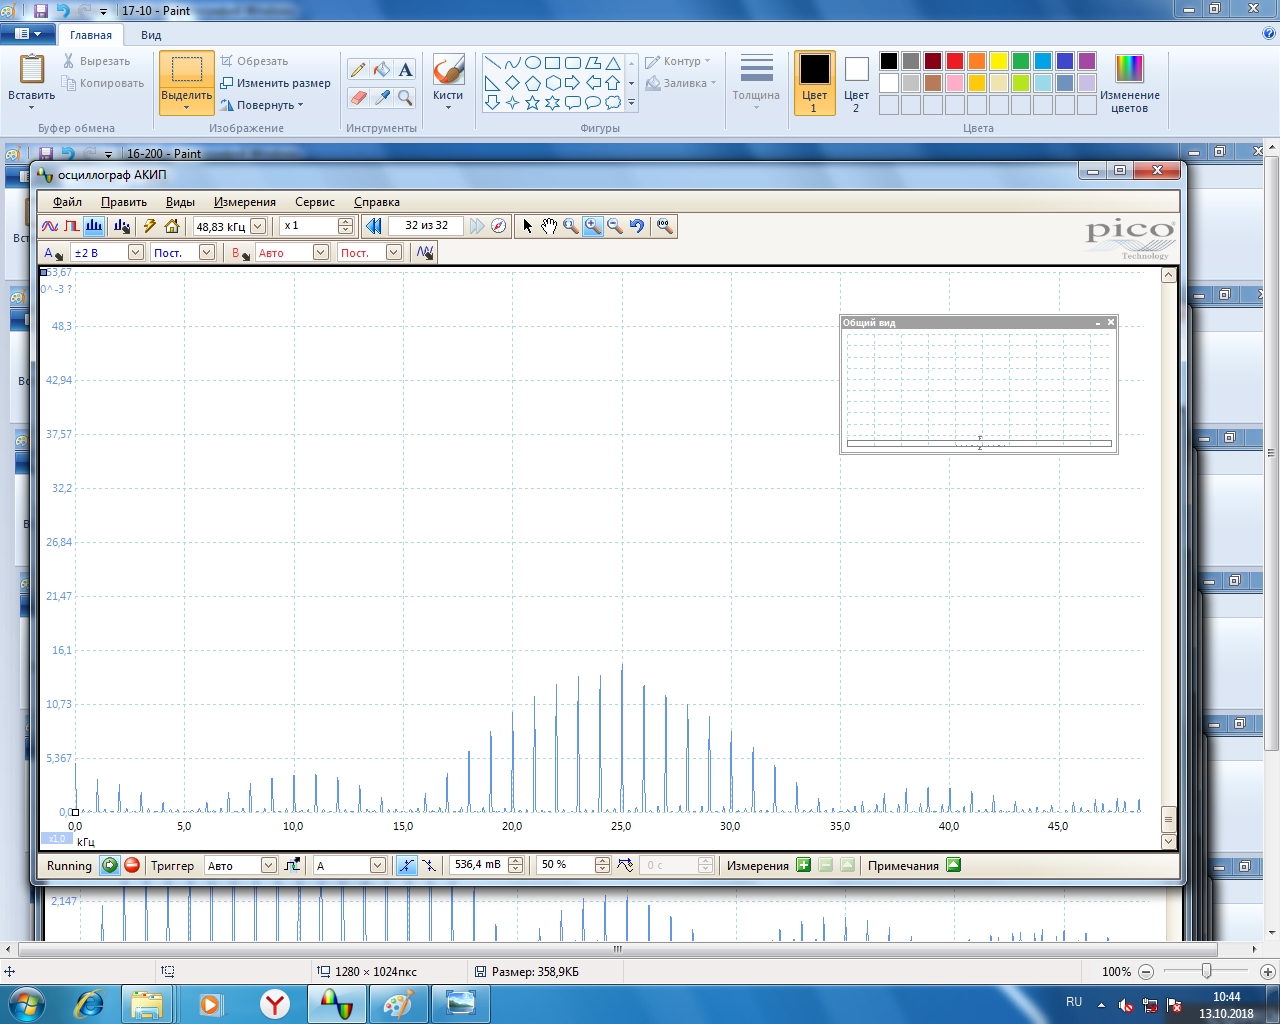

In [12]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/1/17-25.png')

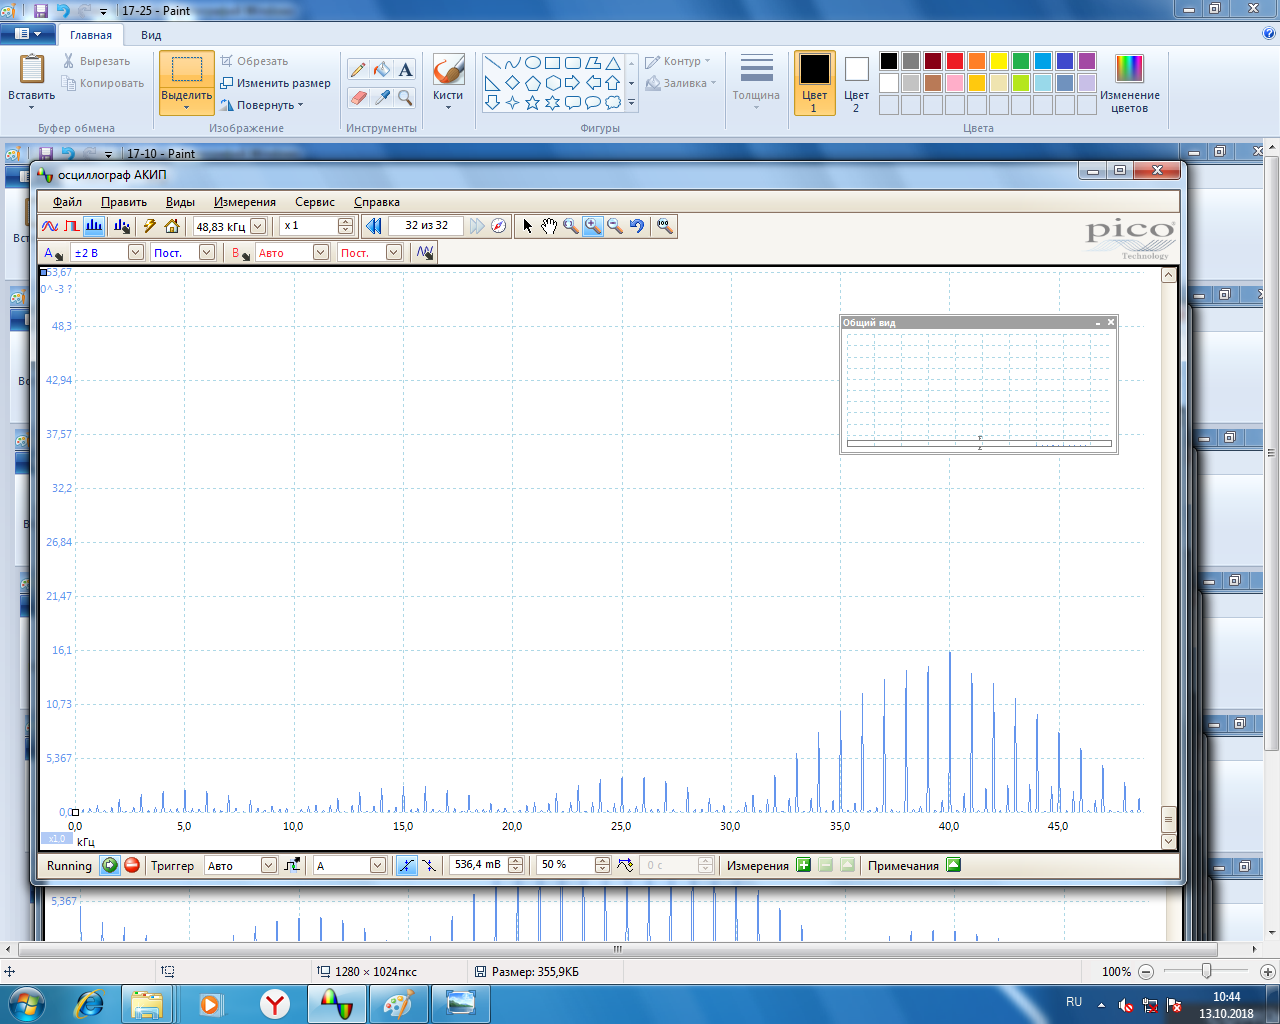

In [13]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/1/17-40.png')

### Как мы и предполагали, несущая частота просто отвечает за сдвиг нашего спектра по оси x.

## Определим расстояние $\Delta \nu$ между соседними спектральными компонентами для разных частот повторения импульсов $f_{повт}$.

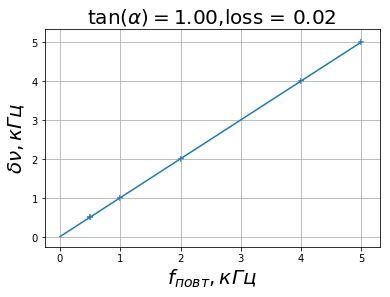

In [20]:
nu_2 = np.array([20/38, 20/20, 20/10, 20/5, 20/4])
f_2 = np.array([0.5, 1,2,4,5])
k_2, b_2, loss_2 = mnkGP(f_2, nu_2)
x_tan_2 = np.linspace(0,5,10)
y_tan_2 = k_2*x_tan_2 + b_2
plt.plot(x_tan_2, y_tan_2)
plt.scatter(f_2, nu_2, marker='+')
plt.ylabel(r'$\delta \nu, кГц$', fontsize=20)
plt.xlabel(r"$f_{повт}, кГц$", fontsize=20)
plt.title(r"$\tan(\alpha) = {1.00} $,loss = 0.02", fontsize=20)
plt.grid(True)

## Сравним построенные спектры

### а) прямоугольных импульсов при одинаковых периодах и разных длительностях импульса $∆\nu = \frac{1}{\tau} \Rightarrow ∆\nu $ уменьшится при увеличении $\tau$;
 
### б) Цугов при одинаковых $\tau$ и разных $f_{повт}$. $\delta \nu$ увеличится при увеличении $f_{повт}$;
 
### в) Цугов и прямоугольных импульсов при одинаковых значениях $\tau$ и $f_{повт}$. Спектр отличается сдвигом на $\omega_0$ в первом случае;

# Исследование спектра гармонических сигналов, модулированных по амплитуде.

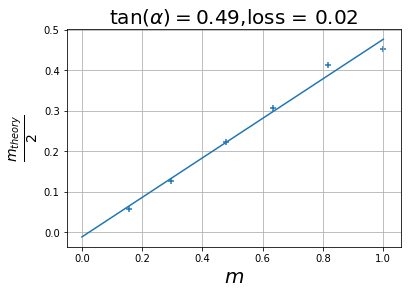

In [19]:
A_max=np.array([0.6,0.66,0.76,0.84,0.93,1])
A_min=np.array([0.48,0.38,0.3,0.22,0.12,0])
tau=[0.2,0.5,0.9,1.2,1.6,2.0]
m=A_max-A_min/(A_max+A_min)
m05_theory=np.array([68.5/4,67.1/8.5,1/0.223,68.7/21,68.5/28.2,67.7/30.6])
m05_theory=1/m05_theory

k_3, b_3, loss_3 = mnkGP(m, m05_theory)
x_tan_3 = np.linspace(0,1,10)
y_tan_3 = k_3*x_tan_3 + b_3
plt.plot(x_tan_3, y_tan_3)
plt.scatter(m, m05_theory, marker='+')
plt.ylabel(r'$\frac{m_{theory}}{2}$', fontsize=20)
plt.xlabel(r"$m$", fontsize=20)
plt.title(r"$\tan(\alpha) = {0.49} $,loss = 0.02", fontsize=20)
plt.grid(True)


### Рассмотрим для примера одно из наших измерений

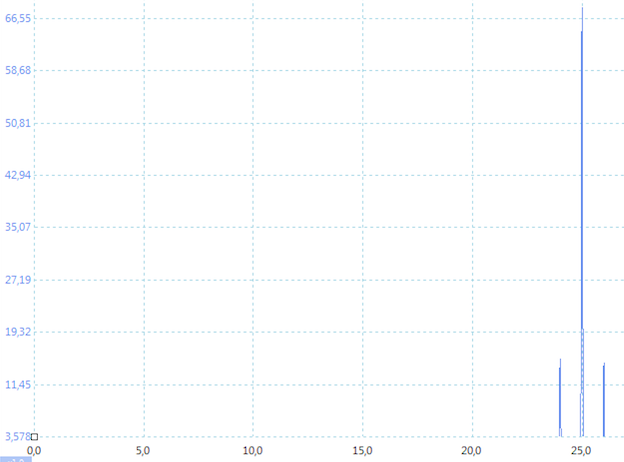

In [32]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/26_1.png')

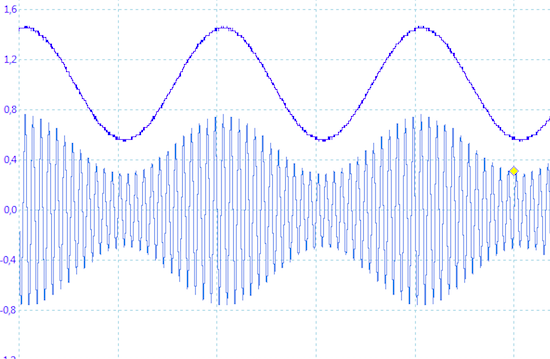

In [35]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/эдектричество/laba4/26_2.png')

### Сверим наши значения с теоретическими.  Эксперементально мы получили  $tg(\alpha)=(0.49+-0.02)$. Наука говорит, что отношение большой и маленькой амплитуды $\frac{m}{2}$.Следовательно, наш результат m совпал с теоретическими ожиданиями.

### Как мы и предполагали, несущая частота просто отвечает за сдвиг нашего спектра по оси x.